In [1]:
#pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [3]:
import warnings
warnings.simplefilter('ignore')

In [4]:
Data=pd.read_csv('Admission_Predict_Ver1.1.csv')
Data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [5]:
NData = Data.drop(['Serial No.'],axis=1)
NData

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [6]:
x = NData.iloc[:,:-2].values
y = NData.iloc[:,-1].values

In [7]:
x

array([[337.  , 118.  ,   4.  ,   4.5 ,   4.5 ,   9.65],
       [324.  , 107.  ,   4.  ,   4.  ,   4.5 ,   8.87],
       [316.  , 104.  ,   3.  ,   3.  ,   3.5 ,   8.  ],
       ...,
       [330.  , 120.  ,   5.  ,   4.5 ,   5.  ,   9.56],
       [312.  , 103.  ,   4.  ,   4.  ,   5.  ,   8.43],
       [327.  , 113.  ,   4.  ,   4.5 ,   4.5 ,   9.04]])

In [8]:
y

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7 ,
       0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91,
       0.9 , 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87,
       0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7 ,
       0.64, 0.64, 0.46, 0.36, 0.42, 0.48, 0.47, 0.54, 0.56, 0.52, 0.55,
       0.61, 0.57, 0.68, 0.78, 0.94, 0.96, 0.93, 0.84, 0.74, 0.72, 0.74,
       0.64, 0.44, 0.46, 0.5 , 0.96, 0.92, 0.92, 0.94, 0.76, 0.72, 0.66,
       0.64, 0.74, 0.64, 0.38, 0.34, 0.44, 0.36, 0.42, 0.48, 0.86, 0.9 ,
       0.79, 0.71, 0.64, 0.62, 0.57, 0.74, 0.69, 0.87, 0.91, 0.93, 0.68,
       0.61, 0.69, 0.62, 0.72, 0.59, 0.66, 0.56, 0.45, 0.47, 0.71, 0.94,
       0.94, 0.57, 0.61, 0.57, 0.64, 0.85, 0.78, 0.84, 0.92, 0.96, 0.77,
       0.71, 0.79, 0.89, 0.82, 0.76, 0.71, 0.8 , 0.78, 0.84, 0.9 , 0.92,
       0.97, 0.8 , 0.81, 0.75, 0.83, 0.96, 0.79, 0.

In [9]:
# from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

#### checking elements in train and test set

In [10]:
x_train

array([[338.  , 117.  ,   4.  ,   3.5 ,   4.5 ,   9.46],
       [319.  , 110.  ,   3.  ,   3.  ,   2.5 ,   8.79],
       [336.  , 112.  ,   5.  ,   5.  ,   5.  ,   9.76],
       ...,
       [290.  , 104.  ,   4.  ,   2.  ,   2.5 ,   7.46],
       [339.  , 119.  ,   5.  ,   4.5 ,   4.  ,   9.7 ],
       [322.  , 110.  ,   4.  ,   4.  ,   5.  ,   9.13]])

In [11]:
x_test

array([[318.  , 106.  ,   2.  ,   4.  ,   4.  ,   7.92],
       [321.  , 114.  ,   4.  ,   4.  ,   5.  ,   9.12],
       [321.  , 111.  ,   3.  ,   2.5 ,   3.  ,   8.9 ],
       [328.  , 116.  ,   5.  ,   4.5 ,   5.  ,   9.08],
       [301.  , 102.  ,   3.  ,   2.5 ,   2.  ,   8.13],
       [314.  , 105.  ,   3.  ,   3.5 ,   2.5 ,   8.3 ],
       [298.  , 101.  ,   2.  ,   1.5 ,   2.  ,   7.86],
       [302.  , 110.  ,   3.  ,   4.  ,   4.5 ,   8.5 ],
       [297.  , 100.  ,   1.  ,   1.5 ,   2.  ,   7.9 ],
       [324.  , 105.  ,   3.  ,   3.  ,   4.  ,   8.75],
       [317.  , 103.  ,   2.  ,   2.5 ,   2.  ,   8.15],
       [320.  , 104.  ,   3.  ,   3.  ,   2.5 ,   8.57],
       [314.  , 102.  ,   2.  ,   2.  ,   2.5 ,   8.24],
       [313.  , 109.  ,   3.  ,   4.  ,   3.5 ,   9.  ],
       [334.  , 117.  ,   5.  ,   4.  ,   4.5 ,   9.07],
       [297.  ,  96.  ,   2.  ,   2.5 ,   1.5 ,   7.89],
       [323.  , 110.  ,   4.  ,   4.  ,   5.  ,   8.88],
       [317.  , 106.  ,   2.  ,

In [12]:
y_train

array([0.91, 0.72, 0.96, 0.67, 0.75, 0.59, 0.72, 0.85, 0.71, 0.77, 0.49,
       0.68, 0.71, 0.5 , 0.57, 0.86, 0.38, 0.94, 0.79, 0.93, 0.74, 0.78,
       0.89, 0.86, 0.49, 0.59, 0.42, 0.61, 0.71, 0.56, 0.7 , 0.82, 0.86,
       0.64, 0.64, 0.67, 0.69, 0.37, 0.73, 0.84, 0.77, 0.78, 0.74, 0.76,
       0.76, 0.65, 0.79, 0.73, 0.81, 0.9 , 0.9 , 0.62, 0.82, 0.62, 0.57,
       0.94, 0.68, 0.64, 0.82, 0.61, 0.66, 0.61, 0.52, 0.73, 0.74, 0.96,
       0.66, 0.65, 0.84, 0.64, 0.59, 0.57, 0.71, 0.77, 0.96, 0.63, 0.8 ,
       0.56, 0.79, 0.93, 0.75, 0.81, 0.87, 0.78, 0.56, 0.47, 0.71, 0.66,
       0.75, 0.74, 0.78, 0.82, 0.44, 0.9 , 0.89, 0.69, 0.82, 0.34, 0.63,
       0.7 , 0.81, 0.61, 0.93, 0.79, 0.64, 0.79, 0.73, 0.73, 0.61, 0.7 ,
       0.93, 0.84, 0.64, 0.71, 0.72, 0.57, 0.65, 0.75, 0.77, 0.7 , 0.65,
       0.59, 0.71, 0.57, 0.52, 0.76, 0.9 , 0.72, 0.56, 0.64, 0.76, 0.94,
       0.71, 0.62, 0.85, 0.55, 0.81, 0.76, 0.9 , 0.42, 0.71, 0.85, 0.8 ,
       0.71, 0.58, 0.77, 0.59, 0.69, 0.79, 0.9 , 0.

In [13]:
y_test

array([0.64, 0.85, 0.8 , 0.91, 0.68, 0.54, 0.54, 0.65, 0.52, 0.79, 0.65,
       0.74, 0.64, 0.79, 0.89, 0.43, 0.81, 0.73, 0.8 , 0.58, 0.57, 0.74,
       0.6 , 0.93, 0.88, 0.67, 0.7 , 0.57, 0.48, 0.64, 0.69, 0.47, 0.57,
       0.87, 0.39, 0.53, 0.84, 0.89, 0.63, 0.7 , 0.72, 0.86, 0.91, 0.75,
       0.74, 0.76, 0.96, 0.81, 0.6 , 0.62, 0.69, 0.68, 0.59, 0.8 , 0.71,
       0.78, 0.69, 0.89, 0.67, 0.58, 0.44, 0.89, 0.53, 0.92, 0.66, 0.73,
       0.52, 0.86, 0.54, 0.72, 0.92, 0.55, 0.75, 0.73, 0.85, 0.91, 0.75,
       0.71, 0.54, 0.68, 0.62, 0.88, 0.59, 0.74, 0.8 , 0.63, 0.77, 0.65,
       0.57, 0.7 , 0.76, 0.78, 0.71, 0.73, 0.73, 0.95, 0.64, 0.53, 0.48,
       0.64])

In [14]:
#from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [15]:
lm.fit(x_train,y_train)

LinearRegression()

In [16]:
predictvalue=lm.predict(x_test)
predictvalue

array([0.65050856, 0.85252175, 0.76957053, 0.87829988, 0.58206979,
       0.6552612 , 0.53357958, 0.70272797, 0.52657039, 0.76570362,
       0.623233  , 0.6995743 , 0.63351197, 0.76572226, 0.8849045 ,
       0.51070449, 0.81941337, 0.65963365, 0.78452942, 0.53615425,
       0.51768259, 0.71585624, 0.52283472, 0.92111458, 0.82747922,
       0.71537508, 0.71551917, 0.51805718, 0.59019195, 0.60348318,
       0.74199981, 0.48840666, 0.65971174, 0.83728292, 0.57596654,
       0.58025817, 0.84084965, 0.86233864, 0.59504654, 0.67091667,
       0.68251819, 0.90088547, 0.86244821, 0.73600207, 0.76753053,
       0.80223082, 0.96999774, 0.84562213, 0.65216892, 0.66735912,
       0.63964977, 0.62392942, 0.62108114, 0.7943316 , 0.70601061,
       0.8527861 , 0.52594439, 0.85720483, 0.60611606, 0.64556952,
       0.47576058, 0.90521329, 0.62809572, 0.94168415, 0.7337594 ,
       0.62291623, 0.73073214, 0.83839568, 0.52289209, 0.77439399,
       0.89302141, 0.80249144, 0.68429419, 0.62917516, 0.78109

In [17]:
compare = pd.DataFrame(predictvalue,columns=['predictvalue'])

In [18]:
compare['AVLDATA']=y_test

In [19]:
compare

,predictvalue,AVLDATA
0,0.650509,0.64
1,0.852522,0.85
2,0.769571,0.80
3,0.878300,0.91
4,0.582070,0.68
...,...,...
95,0.942317,0.95
96,0.558700,0.64
97,0.541739,0.53
98,0.609720,0.48


In [20]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [21]:
mean_squared_error(y_test,predictvalue)

0.004168707909325073

In [22]:
mean_absolute_error(y_test,predictvalue)

0.04731368011169069

In [23]:
r2_score(y_test,predictvalue)

0.7613073242202109

#### Visualizing The Regressor

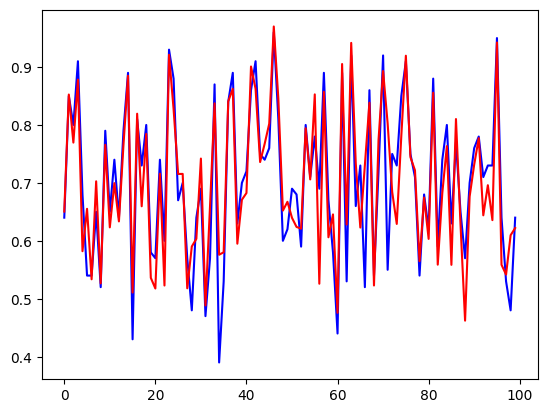

In [24]:
plt.plot(y_test,color='blue')
plt.plot(predictvalue,color='red')